# Case: Lucro por ano

**Pergunta 1** - Quais são os lucros das vendas por ano?

**Pergunta 2** - Em qual ano obtivemos o maior lucro?

## Variáveis de interesse
Os dados necessários para a análise são os lucros totais por ano e os anos que tiveram vendas, para isso, é importante saber como obter o valor correto de cada variável.

### Variável - Total de lucro
É obtido subtraindo o total de custos do total de faturamento por ano.

### Variável - Ano
É obtida extraindo o ano dos dados de vendas.

### Gráfico
Como os itens(anos) que serão comparados, são poucos(4 anos), então um gráfico de colunas atende.

# Resultado
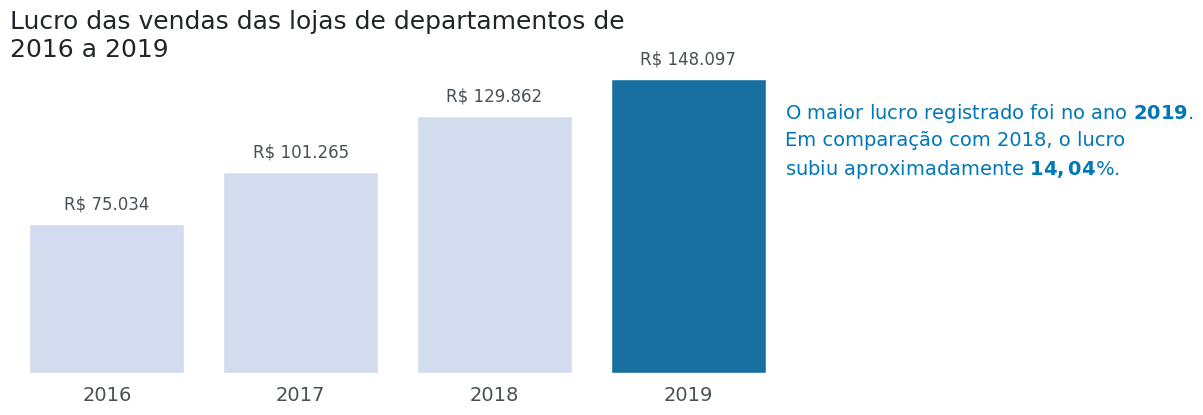

In [ ]:
# Paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")


In [ ]:
# Criando um df com os dados desejados
df_lucro_ano = vendas.copy()
df_lucro_ano = df_lucro_ano[["data_pedido", "lucro"]]

In [ ]:
# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
df_lucro_ano["ano"] = df_lucro_ano.data_pedido.dt.year
df_lucro_ano.drop(labels = "data_pedido", axis = 1, inplace=True)

In [ ]:
# Agrupando os dados por ano
df_lucro_ano = df_lucro_ano.groupby(["ano"]).aggregate("sum")

df_lucro_ano

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style="white")

# Definindo as cores do gráfico
cores = []
for ano in df_lucro_ano.index:
  if df_lucro_ano.loc[ano,"lucro"] == df_lucro_ano["lucro"].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

# Gerando o gráfico de colunas
ax = sns.barplot(data = df_lucro_ano, x = df_lucro_ano.index, y="lucro", palette = cores)

# Personalizando o gráfico
ax.set_title("Lucro das vendas das lojas de departamentos de\n2016 a 2019", loc="left", fontsize = 18, color = CINZA1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize = 14, labelcolor= CINZA2)
sns.despine(left= True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
ax.set_yticklabels([])
for i, valor in enumerate(df_lucro_ano["lucro"]):
  qtd = f'R$ {valor:,.0f}'.replace(",",".")
  offset = 1e4
  ax.text(i, valor + offset, qtd, color = CINZA2, fontsize = 12, ha = "center", va = "center")

# Anotando uma conclusão no gráfico
ax.text(3.5, 1e5,
         'O maior lucro registrado foi no ano $\\bf{2019}$.\n'
         'Em comparação com 2018, o lucro\n'
         'subiu aproximadamente $\\bf{14,04}$%.',
         fontsize=14, linespacing=1.45, color=AZUL2)

# Exibindo o gráfico
plt.show()